# Crime Analysis in the city of Chicago for the year 2021

## In this project I have downloaded, processed, and analyzed a large data set that contains crimes reported in the city of Chicago.

The data is available at [this location](https://data.cityofchicago.org/Public-Safety/Crimes-2021/dwme-t96c/about_data).


In [32]:
%matplotlib inline

import pandas as pd
import numpy as np

In [33]:
#Defining location of dataset 
filepath = "~/library/ist652/fall2024/Assignments/Crimes_-_2021_20241002.csv"

In [34]:
# a security warning will appear. You can ignore it.

crimes = pd.read_csv(filepath, parse_dates=[0], index_col=[0])

/tmp/ipykernel_571/817003350.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv(filepath, parse_dates=[0], index_col=[0])


In [35]:
crimes.head()  #just checking

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,...,36.0,19,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,...,50.0,13,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
12342615,JE202211,04/17/2021 03:20:00 PM,081XX S PRAIRIE AVE,0325,ROBBERY,VEHICULAR HIJACKING,RESIDENCE,True,False,631,...,6.0,44,03,1179448.0,1851073.0,2021,09/14/2023 03:41:59 PM,41.746626,-87.618032,"(41.746626309, -87.618031954)"
26262,JE366265,09/08/2021 04:45:00 PM,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,False,1131,...,24.0,25,01A,1144907.0,1896933.0,2021,09/14/2023 03:41:59 PM,41.873191,-87.743447,"(41.873191445, -87.743446563)"
13209581,JG422927,08/01/2021 12:00:00 AM,012XX E 78TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,411,...,8.0,45,17,NaN,NaN,2021,09/14/2023 03:43:09 PM,NaN,NaN,NaN


In [36]:
crimes.tail()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
13075828,JG264128,04/12/2021 09:00:00 AM,035XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1123,...,28.0,27,11,NaN,NaN,2021,05/18/2023 03:41:30 PM,NaN,NaN,NaN
13101397,JG294103,05/04/2021 12:00:00 PM,072XX S PRAIRIE AVE,1242,DECEPTIVE PRACTICE,COMPUTER FRAUD,RESIDENCE,False,False,323,...,6.0,69,11,NaN,NaN,2021,06/10/2023 03:41:12 PM,NaN,NaN,NaN
13120321,JG317146,10/05/2021 12:00:00 AM,007XX E 81ST ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,631,...,6.0,44,07,NaN,NaN,2021,06/27/2023 03:43:37 PM,NaN,NaN,NaN
13048321,JG160889,09/17/2021 12:00:00 AM,016XX N MASON AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,2531,...,29.0,25,17,NaN,NaN,2021,04/22/2023 03:40:07 PM,NaN,NaN,NaN
13092803,JG284184,08/23/2021 12:00:00 AM,036XX W SHAKESPEARE AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,2525,...,35.0,22,17,NaN,NaN,2021,06/02/2023 03:41:42 PM,NaN,NaN,NaN


In [37]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209357 entries, 25953 to 13092803
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Case Number           209357 non-null  object 
 1   Date                  209357 non-null  object 
 2   Block                 209357 non-null  object 
 3   IUCR                  209357 non-null  object 
 4   Primary Type          209357 non-null  object 
 5   Description           209357 non-null  object 
 6   Location Description  208117 non-null  object 
 7   Arrest                209357 non-null  bool   
 8   Domestic              209357 non-null  bool   
 9   Beat                  209357 non-null  int64  
 10  District              209357 non-null  int64  
 11  Ward                  209346 non-null  float64
 12  Community Area        209357 non-null  int64  
 13  FBI Code              209357 non-null  object 
 14  X Coordinate          202871 non-null  float64
 15 

In [38]:
crimes.dtypes

Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [39]:
crimes.describe()

,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,209357.000000,209357.000000,209346.000000,209357.000000,2.028710e+05,2.028710e+05,209357.0,202871.000000,202871.000000
mean,1151.149816,11.282470,23.143499,37.088500,1.165115e+06,1.885760e+06,2021.0,41.842109,-87.669615
std,698.703526,6.983591,13.904347,21.633944,1.655447e+04,3.201230e+04,0.0,0.088040,0.060253
min,111.000000,1.000000,1.000000,1.000000,1.091242e+06,1.813909e+06,2021.0,41.644608,-87.939733
25%,611.000000,6.000000,10.000000,23.000000,1.153355e+06,1.858101e+06,2021.0,41.765966,-87.712346
50%,1031.000000,10.000000,24.000000,32.000000,1.166967e+06,1.891283e+06,2021.0,41.857250,-87.662960
75%,1722.000000,17.000000,34.000000,55.000000,1.176822e+06,1.909222e+06,2021.0,41.906693,-87.626743
max,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951499e+06,2021.0,42.022548,-87.524529


In [40]:
crimes.Description.describe()

count     209357
unique       279
top       SIMPLE
freq       24594
Name: Description, dtype: object

In [41]:
crimes.District.describe()

count    209357.000000
mean         11.282470
std           6.983591
min           1.000000
25%           6.000000
50%          10.000000
75%          17.000000
max          31.000000
Name: District, dtype: float64

In [42]:
crimes.Arrest.describe()

count     209357
unique         2
top        False
freq      182819
Name: Arrest, dtype: object

## Few Data _Cleaning techniques

In [43]:
#Checking for missing values

crimes.isna().sum()

Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1240
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      11
Community Area             0
FBI Code                   0
X Coordinate            6486
Y Coordinate            6486
Year                       0
Updated On                 0
Latitude                6486
Longitude               6486
Location                6486
dtype: int64

#### There is some missing information in location and ward columns.

In [44]:
# We cannot use columns with space for codes like describe.
# Hence, I will convert the columns name having space in them with '_'

crimes.columns = crimes.columns.str.replace(' ', '_')
crimes.columns

Index(['Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type', 'Description',
       'Location_Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate', 'Y_Coordinate',
       'Year', 'Updated_On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

# Data analysis 1 - Analysis of crime categories (arrest and primary type) over the months

### Analyzing the different categories of crimes recorded and creating a visual plot of the one with most meaning.

In [45]:
arrest = crimes.groupby('Arrest')
df2 = arrest.size()
df2

Arrest
False    182819
True      26538
dtype: int64

In [46]:
total_crime_count = crimes.Primary_Type.count()
total_crime_count

209357

#### There were only 26538 arrests made out of total crime of 209357

In [47]:
# Grouping by 'Primary Type' and 'Arrest' to count occurrences
prim = crimes.groupby(['Primary_Type', 'Arrest']).size().unstack(fill_value=0)
prim

Arrest,False,True
Primary_Type,,
ARSON,482,47
ASSAULT,18514,1829
BATTERY,34694,5777
BURGLARY,6353,309
CONCEALED CARRY LICENSE VIOLATION,6,167
CRIMINAL DAMAGE,24217,878
CRIMINAL SEXUAL ASSAULT,1439,82
CRIMINAL TRESPASS,2409,997
DECEPTIVE PRACTICE,17505,232


In [48]:
#Sorting the values as per the count
prim=prim.sort_values(by=[False, True], ascending=False)
prim

Arrest,False,True
Primary_Type,,
THEFT,39261,1553
BATTERY,34694,5777
CRIMINAL DAMAGE,24217,878
ASSAULT,18514,1829
DECEPTIVE PRACTICE,17505,232
OTHER OFFENSE,12470,1486
MOTOR VEHICLE THEFT,10228,376
ROBBERY,7434,486
BURGLARY,6353,309


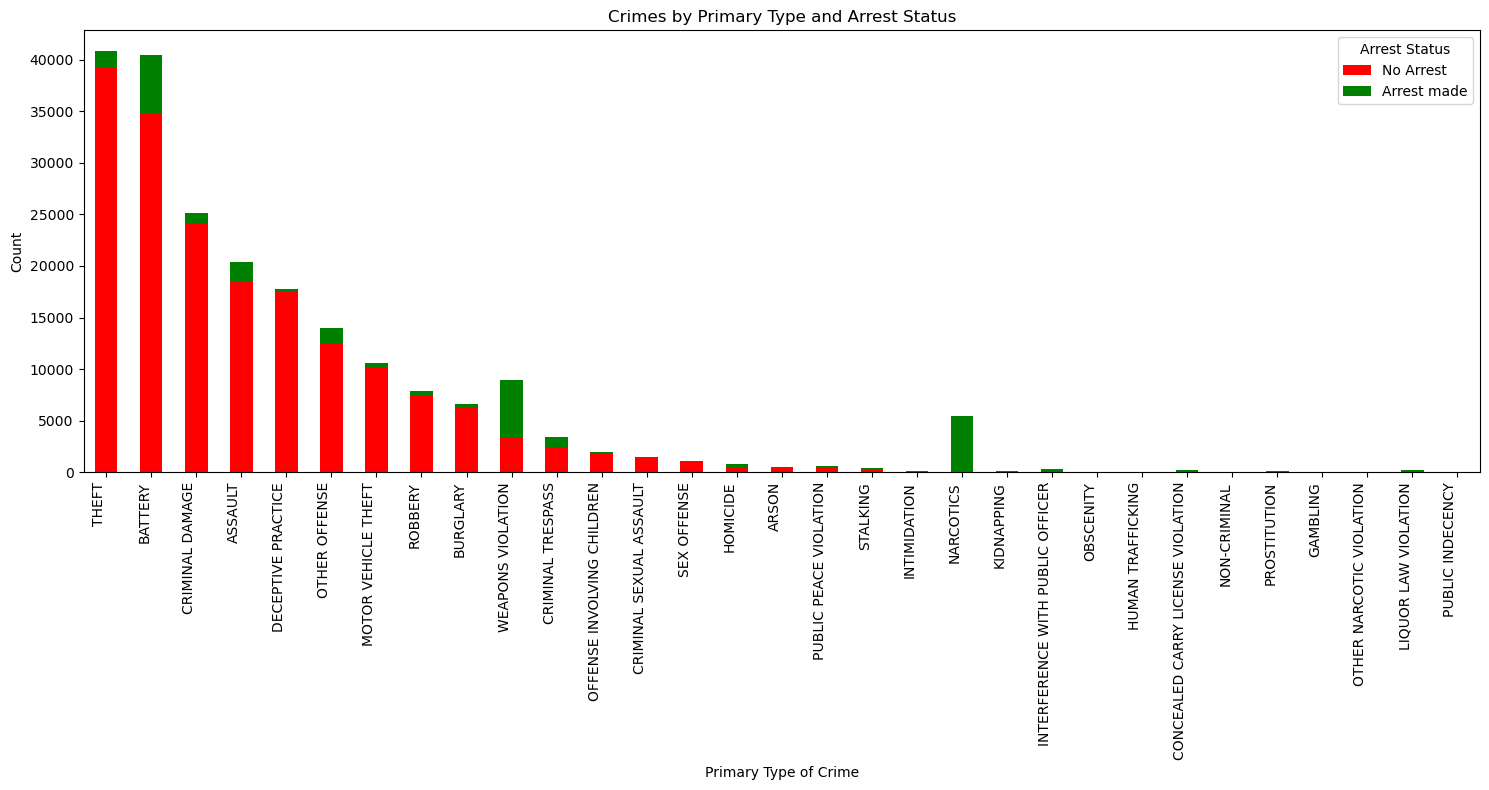

In [49]:
import matplotlib.pyplot as plt

#Plotting bar chart with crime primary types and arrest status
prim.plot(kind='bar', stacked=True, figsize=(15, 8), color=['red', 'green'])

#Adding labels and title
plt.xlabel('Primary Type of Crime')
plt.ylabel('Count')
plt.title('Crimes by Primary Type and Arrest Status')
plt.xticks(rotation=90, ha='right')
plt.legend(['No Arrest', 'Arrest made'], title='Arrest Status')
plt.tight_layout()

plt.show()

#### Theft and battery are among the top most crime types occuring in Chicago.

In [50]:
#Breaking down the date column to get analysis over time period
crimes['Date'] = pd.to_datetime(crimes['Date'])

#Extracting the month from 'Date' and creating a new 'Month' column
crimes['Month'] = crimes['Date'].dt.month

/tmp/ipykernel_571/4220872105.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes['Date'] = pd.to_datetime(crimes['Date'])


In [51]:
#Arrests taken place over the months
months_crime = crimes.groupby(['Month','Arrest'])
crimes_by_months = months_crime.size()
print(crimes_by_months)

Month  Arrest
1      False     13950
       True       2309
2      False     11075
       True       2061
3      False     13554
       True       2625
4      False     13431
       True       2239
5      False     15262
       True       2596
6      False     16432
       True       2435
7      False     16969
       True       2314
8      False     16576
       True       2035
9      False     17184
       True       2092
10     False     17410
       True       1988
11     False     15475
       True       1987
12     False     15501
       True       1857
dtype: int64


In [52]:
#Coverting 'crimes_by_months' to a dataframe to plot it visually
crimes_by_months_df = crimes_by_months.reset_index(name='Count')

In [53]:
#Pivotting the data 
pivot_df = crimes_by_months_df.pivot(index='Month',columns='Arrest',values='Count')

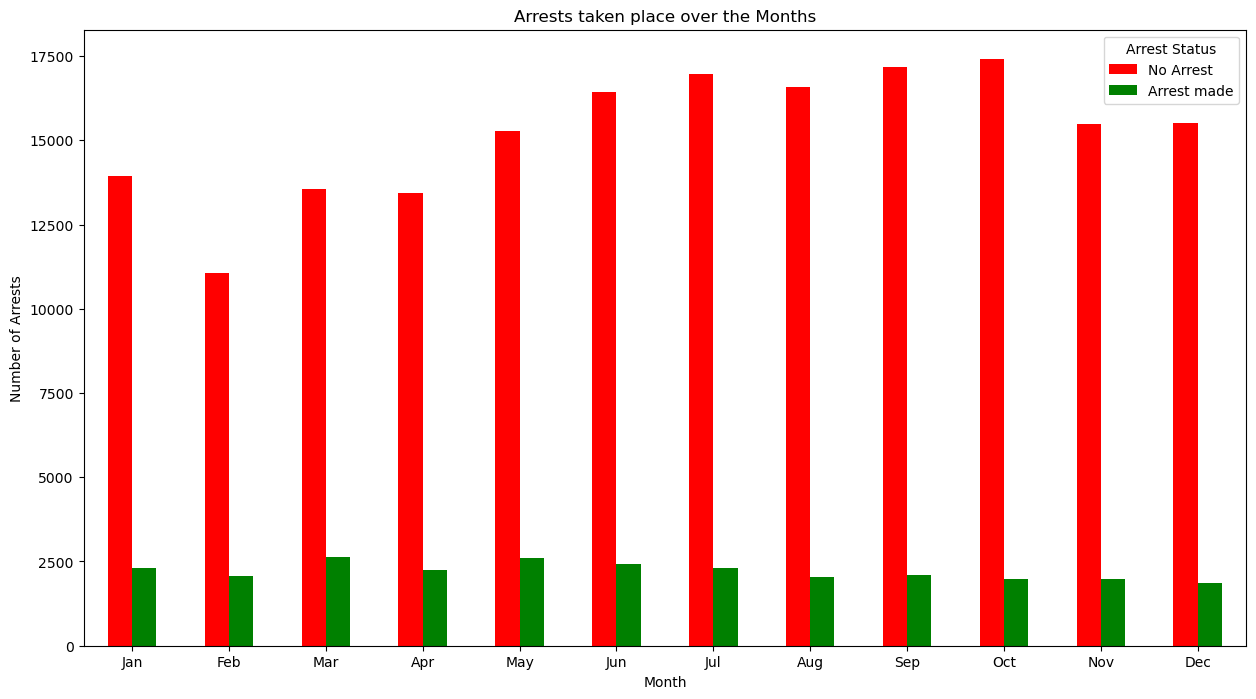

In [24]:
pivot_df.plot(kind='bar', stacked=False, figsize=(15, 8), color=['red', 'green'])

plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.title('Arrests taken place over the Months')
plt.legend(['No Arrest', 'Arrest made'], title='Arrest Status')
plt.xticks(rotation=0)

#To get months names instead of month numbers

import calendar

month_labels = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(ticks=range(12), labels=month_labels, rotation=0)

plt.show()

In [54]:
import seaborn as sns

#Getting date wise data for plotting
daily_crimes = crimes['Date'].dt.to_period('D').value_counts().sort_index().reset_index()
daily_crimes.columns = ['Date', 'Count']
daily_crimes

,Date,Count
0,2021-01-01,827
1,2021-01-02,450
2,2021-01-03,516
3,2021-01-04,534
4,2021-01-05,541
...,...,...
360,2021-12-27,512
361,2021-12-28,459
362,2021-12-29,500
363,2021-12-30,553


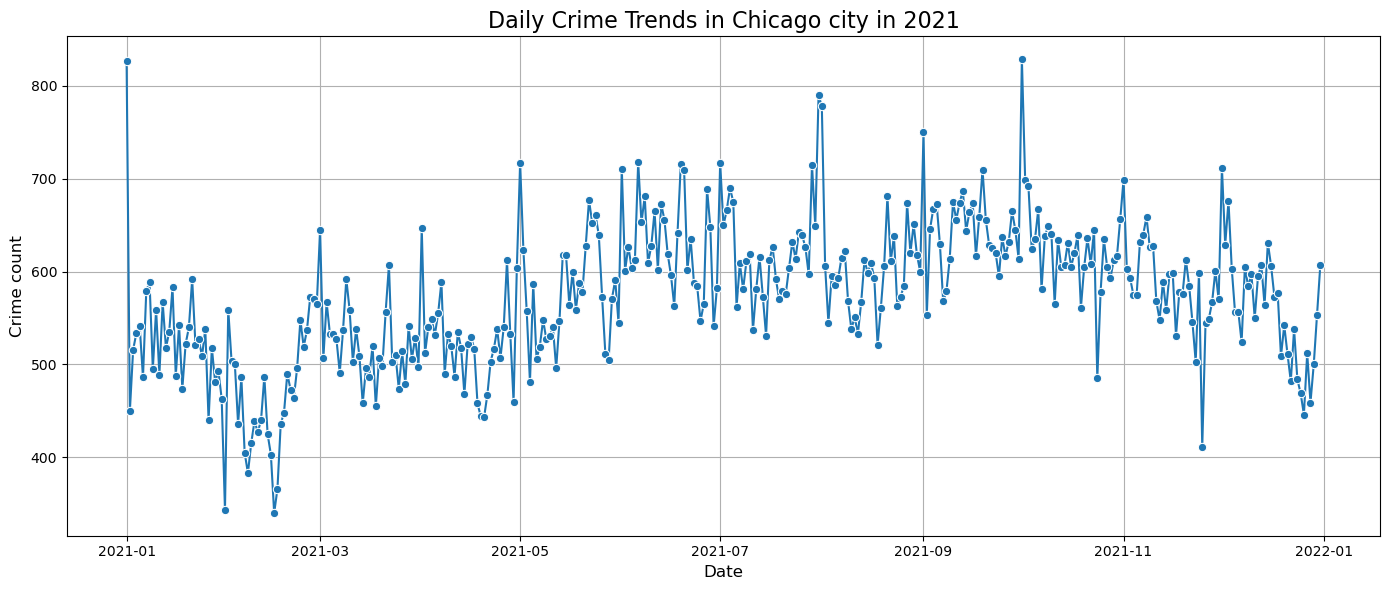

In [55]:
daily_crimes['Date'] = daily_crimes['Date'].astype(str)
daily_crimes['Date'] = pd.to_datetime(daily_crimes['Date'])

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Count', data=daily_crimes, marker='o')
plt.title('Daily Crime Trends in Chicago city in 2021', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Crime count', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Description of data analysis 1

#### There were only 26538 arrests made out of total crime of 209357

#### Crimes by Primary Type and Arrest Stacked bar graph: Theft and battery are among the top most crime types occuring in Chicago. Narcotics crime type has most of the cases arrested.

#### Arrests Taken Place Over the Months Bar Chart:It looked a bit complicated to plot the primary type of crimes over months as it had many different categories leading to too many bars for a month. Hence I plotted the different primary types count and plotted the arrests taken place over the months seperately

#### The difference in the number of arrests made vs not made is too large. The most arrests were made in the month of March while the lowest arrests recorded were in the month of December which could be due to the holiday season.This data is only for 1 year which is 2021 as the dataset contains the crime incidents that took place only for the year 2021.

#### Daily Crime Trends in Chicago city in 2021 Time series plot shows noticeable peaks and dips, indicating specific days with higher or lower crime occurrences.

# Code for data analysis 2 - Analysis of crime by location and hour 

In [56]:
location_crimes = crimes.groupby('Location_Description')
location_crimes_df = location_crimes.size().sort_values(ascending=False)
location_crimes_df

Location_Description
STREET                                    52122
APARTMENT                                 44606
RESIDENCE                                 32404
SIDEWALK                                  12172
PARKING LOT / GARAGE (NON RESIDENTIAL)     6486
                                          ...  
CHA ELEVATOR                                  1
MOTEL                                         1
CHA LOBBY                                     1
FARM                                          1
SCHOOL YARD                                   1
Length: 128, dtype: int64

In [57]:
#Taking only the top 20 locations to plot on graph

location_crimes_df = location_crimes_df.iloc[:20]
location_crimes_df

Location_Description
STREET                                    52122
APARTMENT                                 44606
RESIDENCE                                 32404
SIDEWALK                                  12172
PARKING LOT / GARAGE (NON RESIDENTIAL)     6486
SMALL RETAIL STORE                         5402
ALLEY                                      4904
RESTAURANT                                 3719
RESIDENCE - PORCH / HALLWAY                3027
GAS STATION                                2966
COMMERCIAL / BUSINESS OFFICE               2926
OTHER (SPECIFY)                            2911
VEHICLE NON-COMMERCIAL                     2774
DEPARTMENT STORE                           2454
RESIDENCE - YARD (FRONT / BACK)            2430
RESIDENCE - GARAGE                         2366
GROCERY FOOD STORE                         1975
PARK PROPERTY                              1499
HOTEL / MOTEL                              1224
BAR OR TAVERN                              1149
dtype: int64

In [58]:
#Converting to df
location_crimes_df =location_crimes_df.reset_index()

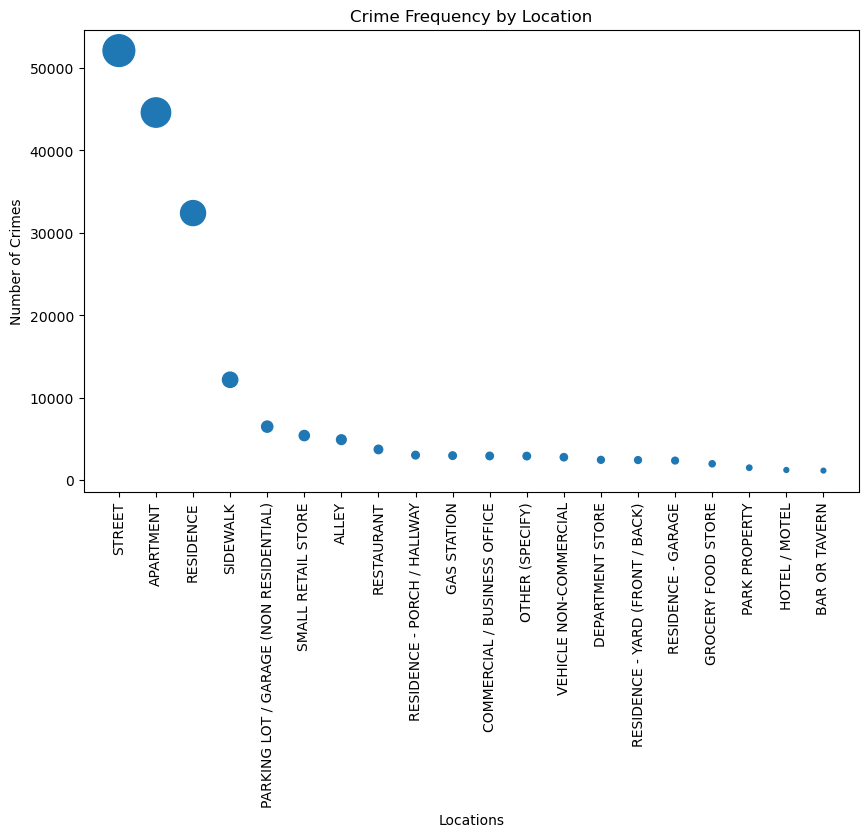

In [30]:
#Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(location_crimes_df.index, location_crimes_df[0], s=location_crimes_df[0]/100)

plt.title('Crime Frequency by Location')
plt.xlabel('Locations')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=location_crimes_df.index, labels=location_crimes_df['Location_Description'], rotation=90)
plt.show()


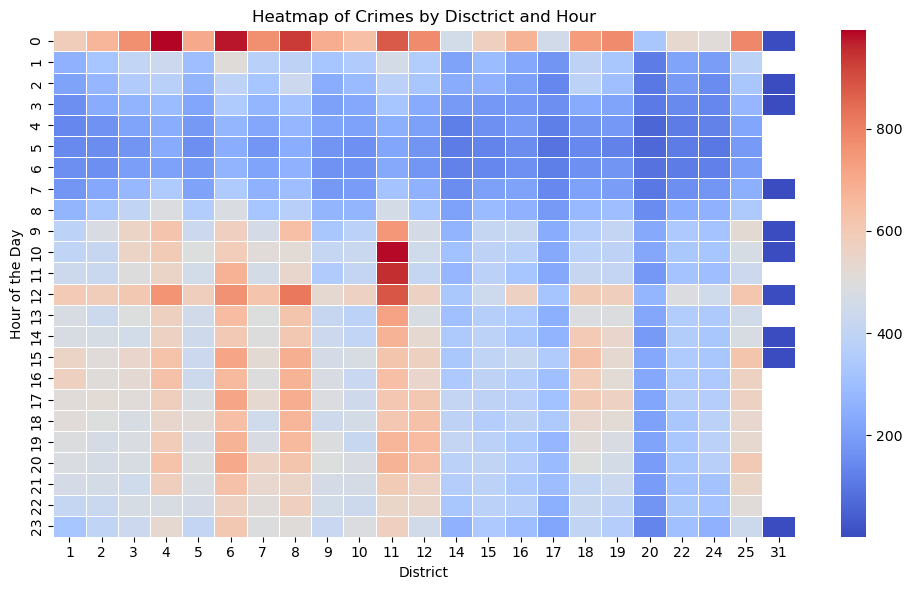

In [59]:
crimes['Hour'] = crimes['Date'].dt.hour

#Selecting a smaller subset of community areas for simplification (e.g., top 10 by crime count)
top_areas = crimes['District'].value_counts().index
simplified_data = crimes[crimes['District'].isin(top_areas)]

#Grouping by community area and hour of the day
heatmap_plot = simplified_data.groupby(['Hour', 'District']).size().unstack()

#Plotting a simpler heatmap of crime incidents by community area and hour of the day with a more descriptive palette
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_plot, cmap="coolwarm", linewidths=.5, annot=False)
plt.title('Heatmap of Crimes by Disctrict and Hour')
plt.xlabel('District')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

## Description of data analysis result 2

#### Crime Frequency by location Scatterplot: There are many locations that are added in the data. By plotting the top 20 locations, it makes the graph easier to plot. The streets, apartment, residence and sidewalk contributes to highest number of crimes. The bigger the dots, higher the count of crimes for that location.

#### Heatmap of Crimes by District and Hour: Districts like 11 and 12 have intense red colors around certain hours (e.g., around noon and midnight), indicating these are peak hours for criminal activity in these districts. In contrast, other districts such as 17, 18, 19, and 24 show much lighter colors (mostly blue), indicating fewer crimes during most hours of the day. 
#### 1 AM to 6 AM seems to have low crime rate while 12 PM to 6 PM has comparatively higher crimes.